In [1]:
%config Completer.use_jedi = False

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  if __name__ == '__main__':


In [2]:
import pandas as pd
import tqdm
import re

from konlpy.corpus import kolaw
from konlpy.tag import Okt, Hannanum, Kkma, Komoran, Twitter, Mecab
import MeCab
from konlpy.utils import concordance, pprint

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글깨짐 설정
import matplotlib.font_manager as fm

# print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))
font_location = '/usr/share/fonts/truetype/NanumGothic.ttf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
plt.rc('font', size=12)        # 기본 폰트 크기

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# df = pd.read_csv('novel_story_sep.csv', lineterminator='\n')
df = pd.read_csv('../Data/novel_story_plus.csv')

In [6]:
df.head(2)

itemId  title                                              story  \
0  281536876  파친코 1  어디에도 속하지 못했던 자이니치들의 분노와 슬픔에서 탄생한 대작!한국계 1.5세인 ...   
1  281536885  파친코 2  어디에도 속하지 못했던 자이니치들의 분노와 슬픔에서 탄생한 대작!한국계 1.5세인 ...   

                                              review  \
0  구상부터 탈고까지 30년이 걸린 대작!차별받는 이민자의 투쟁적 삶을 일제강점기에서부...   
1  구상부터 탈고까지 30년이 걸린 대작!차별받는 이민자의 투쟁적 삶을 일제강점기에서부...   

                                               piece  
0  선자가 웃을 때면 같이 웃지 않고서는 배길 수가 없었다. 선자의 아버지 훈이는 선자...  
1  노아는 엄청난 일을, 거의 불가능에 가까운 일을 해냈다. 그런데 그 모든 것을 무효...

In [7]:
# 불용어 저장 리스트
stopwords = set()

---

# 형태소 분리

In [8]:
text = df['story'][20][:70]
text

'사유가 만들어낸 의미의 집적, 주체하기 어려운 격정그 위에 그려진묵직하고 충격적인 세계새로운 소설의 등장!작가는 광인이거나 천'

## 1. Okt

In [9]:
okt = Okt()
story_okt = okt.morphs(text)
print(story_okt)

['사유', '가', '만들어', '낸', '의미', '의', '집', '적', ',', '주체', '하기', '어려운', '격정', '그', '위', '에', '그려진', '묵직하고', '충격', '적', '인', '세계', '새로운', '소설', '의', '등장', '!', '작가', '는', '광', '인', '이', '거나', '천']


## 2. Hannanum

In [10]:
hannanum = Hannanum()
story_hannanum = hannanum.morphs(text)
print(story_hannanum)

['사유', '가', '만들', '어', '내', 'ㄴ', '의미', '의', '집적', ',', '주체', '하', '기', '어렵', '은', '격정그', '위', '에', '그려진묵직하', '이', '고', '충격적', '이', 'ㄴ', '세계새', '롭', '은', '소설', '의', '등장', '!', '작', '가는', '광인', '이', '거나', '천']


## 3. Kkma

In [11]:
kkma = Kkma()
story_kkma = kkma.morphs(text)
print(story_kkma)

['사유', '가', '만들', '어', '내', 'ㄴ', '의미', '의', '집적', ',', '주체', '하', '기', '어렵', 'ㄴ', '격정', '그', '위', '에', '그려지', 'ㄴ', '묵직', '하', '고', '충격적', '이', 'ㄴ', '세계', '새', '롭', 'ㄴ', '소설', '의', '등장', '!', '작가', '는', '광인', '이', '거나', '천']


## 4. Komoran

In [12]:
komoran = Komoran()
story_komoran = komoran.morphs(text)
print(story_komoran)

['사유', '가', '만들', '어', '내', 'ㄴ', '의미', '의', '집', '적', ',', '주체', '하', '기', '어렵', 'ㄴ', '격정', '그', '위', '에', '그리', '어', '진', '묵직', '하', '고', '충격', '적', '이', 'ㄴ', '세계', '새롭', 'ㄴ', '소설', '의', '등장', '!', '작가', '는', '광', '인', '이', '거나', '천']


## 5. Twitter

In [13]:
twitter = Twitter()
story_twitter = twitter.morphs(text)
print(story_twitter[:50])

['사유', '가', '만들어', '낸', '의미', '의', '집', '적', ',', '주체', '하기', '어려운', '격정', '그', '위', '에', '그려진', '묵직하고', '충격', '적', '인', '세계', '새로운', '소설', '의', '등장', '!', '작가', '는', '광', '인', '이', '거나', '천']


## 6. MeCab

In [14]:
mecab = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ko-dic')

In [15]:
mecab_text = mecab.parse(text).split()
for idx,txt in enumerate(mecab_text):
    if idx % 2 == 0 and idx != len(mecab_text)-1:
        print(txt, end =', ')

사유, 가, 만들, 어, 낸, 의미, 의, 집, 적, ,, 주체, 하, 기, 어려운, 격정, 그, 위, 에, 그려진, 묵직, 하, 고, 충격, 적, 인, 세계, 새로운, 소설, 의, 등장, !, 작가, 는, 광인, 이, 거나, 천, 

---

## Okt로 형태소 분리

In [16]:
story = df['story']

* 소설 스토리가 중복되어 있는 경우는 제거 = 집합 자료형 이용해서 중복된 것은 생기지 않도록 만들었음

In [17]:
all_words = set()
for s in story:
    okt = Okt()
    story_sep = okt.pos(s)
    all_words.add(tuple(story_sep))
len(all_words)

1114

### 단어 분포 파악을 위한 데이터 프레임 생성

In [18]:
necessary_words = []
necessary_type = ('Noun', 'Verb', 'Adjective')
for idx, all_word in enumerate(all_words):
    for word,typ in all_word:
        if typ in necessary_type and word not in stopwords:
            necessary_words.append([idx, word, typ])
len(necessary_words)

165002

* words_df columns : 문서No. / 분리된 형태소(단어) / 형태(명사,형용사,동사)

In [19]:
words_df = pd.DataFrame(data = necessary_words, columns=['docNo', 'word', 'type'])

In [20]:
words_df

docNo  word       type
0           0   웹소설       Noun
1           0    전설       Noun
2           0     된       Verb
3           0   윤이수       Noun
4           0     궁       Noun
...       ...   ...        ...
164997   1113    청춘       Noun
164998   1113  담백하고  Adjective
164999   1113    따듯       Verb
165000   1113    위로       Noun
165001   1113   건넨다       Verb

[165002 rows x 3 columns]

---

## 형태소 분리한 데이터 살펴보기

### 문서별 단어 개수 히스토그램

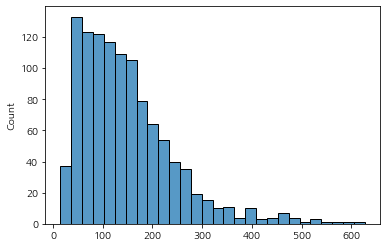

In [21]:
sns.histplot(words_df.value_counts('docNo'))
plt.show()                    

단어 수가 20\~40개인 경우가 가장 많았고, 단어수 20\~180개인 경우가 약 40%를 차지함.

#### 단어 개수 분포 (상위 25개)

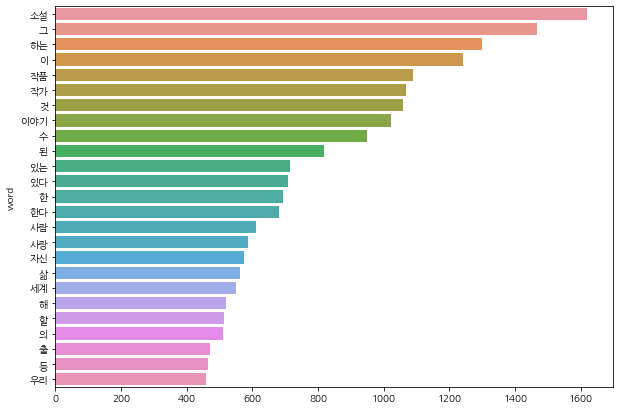

In [22]:
fre_words = words_df.value_counts('word')[:25]
plt.figure(figsize=(10,7))
sns.barplot(y=fre_words.index,x=fre_words)
plt.show()

단어 개수가 가장 많은 '소설', '그', '하는', '이', '작품' 등 Topic 분류 작업시 감성이나 장르에 따라 구분되지 않는 단어들 상당수.

### 형태소 type별 단어 빈도수 시각화

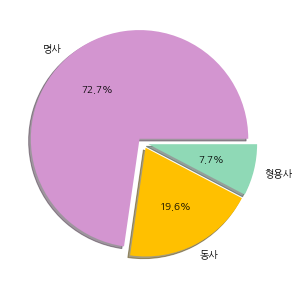

In [23]:
Noun = words_df[words_df['type'] == 'Noun']
Verb = words_df[words_df['type'] == 'Verb']
Adjective = words_df[words_df['type'] == 'Adjective']

plt.figure(figsize=(5, 5))
explode = [0.05, 0.05, 0.05]
colors = ['#d395d0', '#ffc000', '#8fd9b6']
plt.pie((len(Noun), len(Verb), len(Adjective)), labels=('명사', '동사', '형용사'), autopct='%.1f%%',  explode=explode, colors=colors, shadow=True)
plt.show()

명사형이 72.7%로 상당수

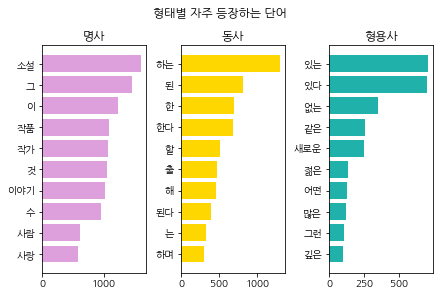

In [24]:
fig, axs = plt.subplots(1,3,constrained_layout=True)

fig.suptitle('형태별 자주 등장하는 단어')
                        
Noun_fre_words = Noun.value_counts('word')[:10]
axs[0].barh(Noun_fre_words.index[::-1],Noun_fre_words[::-1],color='plum')
axs[0].set_title('명사')

Verb_fre_words = Verb.value_counts('word')[:10]
axs[1].barh(Verb_fre_words.index[::-1],Verb_fre_words[::-1],color='gold')
axs[1].set_title('동사')

Adjective_fre_words = Adjective.value_counts('word')[:10]
axs[2].barh(Adjective_fre_words.index[::-1],Adjective_fre_words[::-1],color='lightseagreen')
axs[2].set_title('형용사')

plt.show()

### wordcloud 이용해서 단어 살펴보기

In [25]:
from wordcloud import WordCloud
#, STOPWORDS #stopwords = set(STOPWORDS) 

def show_wordcloud(data): 
    wordcloud = WordCloud(
        font_path = r'/usr/share/fonts/truetype/NanumGothic.ttf', #글자가 깨져서 폰트 파일의 주소를 할당해 주었다. 
                          background_color='white', 
                          #stopwords=stopwords, 
                          max_words=100, 
                          max_font_size=30, 
                          scale=3, 
                          random_state=1) 
    
    wordcloud=wordcloud.generate(str(data)) 
    
    fig = plt.figure(1, figsize=(12, 12)) 
    plt.rcParams['font.family'] = 'NanumGothic' 
    plt.axis('off') 
    
    plt.imshow(wordcloud) 
    plt.show() 

### 명사 자세하게 살펴보기

In [26]:
Noun_count_df = pd.DataFrame(Noun.value_counts('word'))
Noun_count_df.reset_index(inplace=True)
Noun_count_df.rename({0:'count'}, axis=1, inplace=True)
Noun_count_df.head(5)

word  count
0   소설   1618
1    그   1467
2    이   1242
3   작품   1089
4   작가   1067

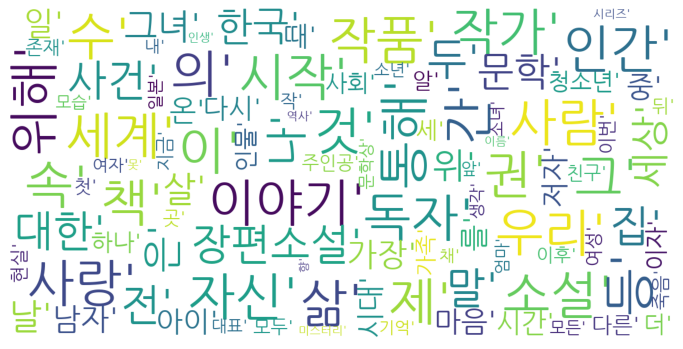

In [27]:
Noun_count = Noun_count_df['count']
Noun_most = list(Noun_count_df['word'])
    
show_wordcloud(Noun_most)

In [28]:
print(list(Noun_count_df.word[:100]))
stopwords.update(('소설', '그', '이', '작품', '작가', '것', '이야기', '수', '의', '등', '우리', '독자', '간', '책', 
                  '제', '속', '통해', '권', '위해', '장편소설', '두', '전', '대한', '은', '위', '가장', '저자', '를', '온',
                 '중', '때', '다시', '더', '하나', '이자', '세', '인물', '다른', '알', '이후', '첫', '곳', '뒤', '작', 
                 '지금', '모두',  '이번',  '내', '채', '모든', '문학상', '앞',  '시리즈',  '못', '이름', '문제', '후', '안',
                 '무엇', '로', '동안', '또', '신작', '수상작', '대해', '년', '편', '김', '또한', '수록', '번', '번역', '문장', 
                 '소설가','가지', '선정',  '최고',  '개', '그것', '단편', '때문', '과' ,'듯', '국문학', '이제',
                 '점', '베스트셀러', '데', '연재', '한편', '자', '네', '관', '감', '데뷔', '부', '둘', '장', '거', '로서', '바로', 
                 '게', '란', '도', '단편소설', '다섯', '더욱', '저', '전집', '개정판', '호', '로부터',))
# print(stopwords)

['소설', '그', '이', '작품', '작가', '것', '이야기', '수', '사람', '사랑', '자신', '삶', '세계', '의', '등', '우리', '독자', '간', '책', '제', '속', '인간', '시작', '통해', '권', '위해', '장편소설', '사건', '나', '집', '말', '두', '전', '대한', '한국', '문학', '세상', '은', '그녀', '위', '살', '날', '가장', '일', '남자', '마음', '저자', '를', '온', '아이', '중', '시대', '시간', '때', '다시', '청소년', '더', '사회', '하나', '이자', '세', '인물', '다른', '알', '가족', '주인공', '이후', '첫', '친구', '현실', '존재', '곳', '뒤', '작', '여성', '지금', '모두', '죽음', '이번', '모습', '소년', '여자', '생각', '내', '채', '모든', '문학상', '앞', '대표', '기억', '소녀', '일본', '엄마', '시리즈', '향', '역사', '미스터리', '못', '이름', '인생']


### 형용사 자세하게 살펴보기

In [29]:
Adjective_count_df = pd.DataFrame(Adjective.value_counts('word'))
Adjective_count_df.reset_index(inplace=True)
Adjective_count_df.rename({0:'count'}, axis=1, inplace=True)
Adjective_count_df.head(5)

word  count
0   있는    713
1   있다    707
2   없는    349
3   같은    255
4  새로운    250

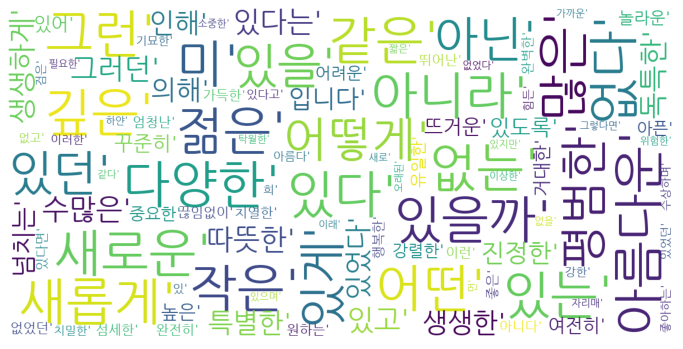

In [30]:
Adjective_count = Adjective_count_df['count']
Adjective_most = list(Adjective_count_df['word'])
    
show_wordcloud(Adjective_most)

In [31]:
# print(list(Adjective_count_df.word[:100]))
stopwords.update(('있는', '있다', '없는', '같은', '어떤', '많은', '아니라', '없다', '있을까', '미', '어떻게', '아닌', '있던',
                  '있을', '있게', '그러던', '있다는', '있고', '있었다', '의해', '인해', '입니다', '있도록', '있어','아니다', '없었던', 
                  '이런', '있다면', '있', '이러한', '있었던', '없고', '있다고', '그렇다면', '있으며', '있지만',
                 '없을', '없었다',  '같다', '이래', '아닐', '그런'))

### 동사 자세하게 살펴보기

In [32]:
Verb_count_df = pd.DataFrame(Verb.value_counts('word'))
Verb_count_df.reset_index(inplace=True)
Verb_count_df.rename({0:'count'}, axis=1, inplace=True)
Verb_count_df.head(5)

word  count
0   하는   1299
1    된    817
2    한    693
3   한다    682
4    할    513

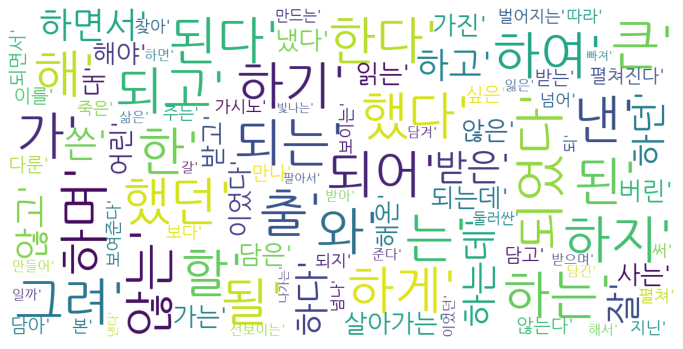

In [33]:
Verb_count = Verb_count_df['count']
Verb_most = list(Verb_count_df['word'])
    
show_wordcloud(Verb_most)

In [34]:
# print(list(Verb_count_df.word[100:200]))
stopwords.update(('하는', '된', '한', '한다', '할', '출', '해', '된다', '는', '하며', '했다', '되는', '하게', '되었다', 
                  '되어', '가', '했던', '될', '하여', '그려', '낸', '되고', '하지', '하기', '와', '않는', '하면서', 
                  '하다', '잘', '하고', '하는데', '쓴', '않고', '하던', '되는데', '않은', '담은', 
                  '사는', '가진', '냈다', '대', '받고', '이었다', '해야', '가는', '해온', 
                  '싶은', '받는', '이를', '않는다', '만나', '담아', '되면서', '담고', '다룬', '보여준다', '따라', 
                  '보다',  '되지', '주는', '본', '찾아', '써', '넘어', 
                  '넘나', '되', '선보이는', '준다', '해서', '일까', '만들어', '이었던', '받아', '받으며', 
                  '담긴', '담겨', '갈', '하면', '나가는', '빠져', '낸다', '였다', '였던', '지', '이어', '드는' , '않았다',
                  '발간', '문학', '현대문학',))

In [35]:
print(stopwords)

{'하게', '그것', '되', '선보이는', '해서', '빠져', '있으며', '문학상', '소설가', '작품', '하는데', '온', '있었다', '로부터', '이제', '가는', '뒤', '하기', '받아', '되지', '도', '있을', '된', '과', '우리', '따라', '하며', '했던', '앞', '받는', '되면서', '통해', '부', '해', '본', '일까', '그러던', '못', '있고', '또', '하면', '없는', '없었던', '발간', '한다', '번', '있게', '해야', '나가는', '이어', '잘', '문장', '이자', '국문학', '있을까', '더욱', '대한', '되는', '미', '관', '준다', '된다', '듯', '점', '중', '권', '네', '와', '낸', '이런', '무엇', '하는', '냈다', '연재', '다섯', '입니다', '받으며', '로', '동안', '갈', '두', '세', '현대문학', '수', '그려', '찾아', '출', '되는데', '모든', '있도록', '했다', '않은', '하면서', '없을', '있지만', '내', '최고', '사는', '이번', '가지', '되고', '한', '속', '개정판', '다른', '될', '가장', '이후', '할', '베스트셀러', '은', '는', '이었던', '선정', '이', '없었다', '알', '어떻게', '담아', '담겨', '안', '단편소설', '년', '없고', '담고', '후', '하던', '수상작', '또한', '그', '간', '있는', '만나', '않는다', '게', '위해', '인물', '채', '있다고', '문학', '만들어', '많은', '대해', '감', '이래', '이러한', '싶은', '써', '번역', '전', '시리즈', '않는', '호', '보다', '것', '같은', '독자', '담긴', '전집', '곳', '넘나', '때문', '있다면', '등', '거', '이야기', '그렇다면', '담은', '작가

In [36]:
all_words = []

necessary_type = ('Noun', 'Verb', 'Adjective')

for s in story:
    okt = Okt()
    story_sep = okt.pos(s)
    sentence = ''
    for word,typ in story_sep:
        if (word not in stopwords) and (typ in necessary_type):
            sentence += word + ' '
    all_words.append(sentence)

len(all_words)

df['story'] = all_words

In [37]:
review = df['review']

In [38]:
all_words = []

necessary_type = ('Noun', 'Verb', 'Adjective')

for r in review:
    try:
        okt = Okt()
        story_sep = okt.pos(r)
        sentence = ''
        for word,typ in story_sep:
            if (word not in stopwords) and (typ in necessary_type):
                sentence += word + ' '
        all_words.append(sentence)
    except:
        all_words.append('')
len(all_words)

df['review'] = all_words

In [39]:
piece = df['piece']

In [40]:
all_words = []

necessary_type = ('Noun', 'Verb', 'Adjective')

for p in piece:
    try:
        okt = Okt()
        story_sep = okt.pos(p)
        sentence = ''
        for word,typ in story_sep:
            if (word not in stopwords) and (typ in necessary_type):
                sentence += word + ' '
        all_words.append(sentence)
    except:
        all_words.append('')
len(all_words)

df['piece'] = all_words

In [41]:
df.to_csv('novel_story_sep.csv', index=False)

In [42]:
df

itemId                    title  \
0     281536876                    파친코 1   
1     281536885                    파친코 2   
2     348921505  불편한 편의점(40만부 기념 벚꽃 에디션)   
3     354595636                     저주토끼   
4     266107628                      아몬드   
...         ...                      ...   
1113  255740918  군주론 3: 노무현 편(2003-2008)   
1114  230918620          사기꾼의 심장은 천천히 뛴다   
1115  353660972                  머드(MUD)   
1116  226451353               복자는 울지 않았다   
1117  217554266                  학마을 사람들   

                                                  story  \
0     어디 자이니치 분노 슬픔 탄생 대작 한국 세인 미국 이민 진의 파친코 국 면서 끝내...   
1     어디 자이니치 분노 슬픔 탄생 대작 한국 세인 미국 이민 진의 파친코 국 면서 끝내...   
2     인터넷 한정 특별판 매장 구매 드림 구매 시 표지 에디 션 제공 됩니다 원 플러스 ...   
3     부커상 최종 후보 명작 한국 호러 판타지 대표 정보라 대표 인터내셔널 부커상 차 후...   
4     괴물 괴물 만났다 영화 강렬한 사건 매혹 문체 시선 사로잡는 한국 영 어덜트 아몬드...   
...                                                 ...   
1113  이완호 군주론 노무현 겪었고 각 군주 말년 각 모아 펴냈다 당시 생생한 현장 떠올릴...   
1114  출장 신기한 사실 비밀 평범한 직장인 일상 인간관계 세계관 인생 송두리째 바뀐다 상...   
1115  나 사랑 죽 바닥 가라앉았던 마음 순식간 목 끝 튀어 오르고 눈 멀 정도 눈부신 빛...   
1116  정낙추 집 복자 울 개발 이윤 논리 훼손 시대 자화상 민중 입담 밀도 표 제작 주인...   
1117  한국 대표 중요 엄선 선집 사피 스 학 마을 사람 부조리 만연한 전후 현실 배경 평...   

                                                 review  \
0     구상 탈고 걸린 대작 차별 이민자 투쟁 삶 일제강점기 걸쳐 재일 한국인 가슴 아픈 ...   
1     구상 탈고 걸린 대작 차별 이민자 투쟁 삶 일제강점기 걸쳐 재일 한국인 가슴 아픈 ...   
2     불편한데 자꾸 가고 편의점 힘들게 살 오늘 위로 편의점 밤 정체 불명 알바로 시작 ...   
3                                                         
4     감정 느끼지 소년 특별한 성장 아몬드 주인공 윤재 감정 느끼는 어려움 겪는 독특한 ...   
...                                                 ...   
1113                                                      
1114  전적 스타일 현대 플롯 절묘하게 접목 시킨 당신 단 접 해보지 새로운 스타일 환상문...   
1115  바닥 가라앉았던 마음 순식간 목 끝 튀어 오르고 눈 멀 정도 눈부신 빛 켜진 순간 ...   
1116  개발 이윤 논리 가득한 세상 생동 민중 풀빛 카니발 개발 이윤 논리 훼손 시대 자화...   
1117  부조리 만연한 전후 현실 배경 평화 온화한 과거 삶 잃어버린 사람 고통 방황 서정 ...   

                                                  piece  
0     선 웃 웃지 않고서는 배길 수가 선 아버지 훈이 선 태어나는 순간 자신 딸 맹목 사...  
1     노아 엄청난 일 거의 불가능 가까운 일 해냈다 무효 만들고 노아 시험 합격 되돌린다...  
2     마지막 술 먹고 술 끊는 조건 가게 일 좀 봐줘요 독고 씨 커다란 머리 거렸 요 독...  
3     저주 토끼 할아버지 늘 말씀 하셨다 저주 쓰이는 물건 예쁘게 만들어야 법 대를 저주...  
4     프롤로그 나 아몬드 당신 당신 소중하게 여기거나 저주 누군가 가졌다 아무 느낄 음 ...  
...                                                 ...  
1113                                                     
1114  돌아보면 거기 였습니다 대학 다니면서 가끔 그녀 마주치 기도 했지만 학기 친해진 적...  
1115  등장 요란하기도 사랑 세상 사랑 미워하는 너 진동 방 꽉 채우자 물건 흔들린다 목소...  
1116  농사 짓지 사람 땅 얼마나 사랑 하기에 입길 오르며 땅 사는지 모르지만 땅 파먹고 ...  
1117  학 마을 자동차 가려 해도 길이 험하고 시간 걸리는 두메산골 강원도 어디 있습니다 ...  

[1118 rows x 5 columns]